In [1]:
import pandas as pd
import numpy as np
import os


import sqlalchemy as db
from sqlalchemy import create_engine, MetaData, inspect

engine = db.create_engine('sqlite:////Users/michaelharnett/Library/Messages/chat.db')
connection = engine.connect()
metadata = db.MetaData()

savagesdf = pd.read_sql("select distinct m.rowid ,m.is_from_me IsFromMe ,case when m.is_from_me = 1 then m.account else h.id end as FromPhoneNumber ,datetime((m.date / 1000000000) + 978307200, 'unixepoch', 'localtime') as TextDate, m.text MessageText,c.display_name RoomName from message as m left join handle as h on m.handle_id = h.rowid left join chat as c on m.cache_roomnames = c.room_name left join chat_handle_join as ch on c.rowid = ch.chat_id left join handle as h2 on ch.handle_id = h2.rowid where RoomName LIKE 'Savages%' order by m.date desc;", engine)




In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
savagesdf = savagesdf[['FromPhoneNumber','TextDate','MessageText']]

In [4]:
savagesdf.rename(columns = {'FromPhoneNumber':'player', "TextDate": 'date', 'MessageText':'text'}, inplace = True)

In [5]:
savagesdf.loc[savagesdf.player == '+12017248296', 'player'] = 'kell'
savagesdf.loc[savagesdf.player == '+12017447544', 'player'] = 'd'
savagesdf.loc[savagesdf.player == '+18456083263', 'player'] = 'drie'
savagesdf.loc[savagesdf.player == '+12017554735', 'player'] = 'jose'
savagesdf.loc[savagesdf.player == '+12012706619', 'player'] = 'nick'
savagesdf.loc[savagesdf.player == 'E:michaelcharnett@gmail.com', 'player'] = 'michael'
savagesdf.loc[savagesdf.player == 'e:michaelcharnett@gmail.com', 'player'] = 'michael'

In [6]:
savagesdf

,player,date,text
0,michael,2022-05-09 17:52:57,Wordle 324 5/6\n\n🟨⬛⬛⬛🟨\n⬛🟩⬛⬛🟩\n⬛🟩⬛⬛🟩\n🟩🟩🟨⬛🟩\n...
1,nick,2022-05-09 12:56:15,Wordle 324 5/6\n\n🟩⬛⬛⬛🟩\n🟩⬛⬛⬛🟩\n🟩⬛⬛⬛🟩\n🟩⬛⬛🟩🟩\n...
2,kell,2022-05-09 12:13:08,😂😂
3,drie,2022-05-09 12:11:27,So much shame
4,drie,2022-05-09 12:11:24,Lmfao same
...,...,...,...
10455,jose,2021-07-10 16:28:29,Fuck u nick
10456,jose,2021-07-10 16:28:24,Loved an image
10457,drie,2021-07-10 16:27:03,And im back lol
10458,drie,2021-07-10 16:27:00,Kelly


In [29]:
savagesdf.player.value_counts()

array([2821, 2334, 1722, 1544, 1377,  662])

<BarContainer object of 6 artists>

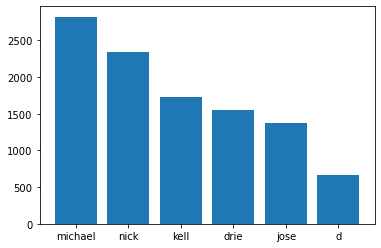

In [22]:
plt.bar(x = list(savagesdf.player.unique()), height = savagesdf.player.value_counts())

In [9]:
savagesdf.player

0        michael
1           nick
2           kell
3           drie
4           drie
          ...   
10455       jose
10456       jose
10457       drie
10458       drie
10459       drie
Name: player, Length: 10460, dtype: object

In [12]:
plt.bar(savagesdf.value_counts())

TypeError: bar() missing 1 required positional argument: 'height'

In [15]:
list(savagesdf.player.unique())

['michael', 'nick', 'kell', 'drie', 'jose', 'd']

In [32]:
savagesdf.player.valu

<bound method Series.keys of 0        michael
1           nick
2           kell
3           drie
4           drie
          ...   
10455       jose
10456       jose
10457       drie
10458       drie
10459       drie
Name: player, Length: 10460, dtype: object>

<BarContainer object of 6 artists>

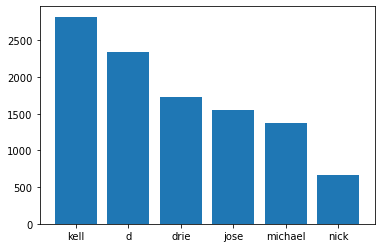

In [35]:
## winner this is the easiest one line of code I was able to thow together for comparing our number of txts 
#### next is to only make it look nicer using seaborn or something. 

plt.bar(x = list(savagesdf.player.value_counts().keys()), height = savagesdf.player.value_counts().values)